In [120]:
# !pip install librosa
# !pip install matplotlib
# !pip install seaborn

In [121]:
import soundfile as sf
import matplotlib.pyplot as plt
import seaborn as sns
from math import floor
import numpy as np
# import librosa

In [122]:
# sample, fs = sf.read('./TinHieuKiemThu/phone_M1.wav', dtype="float32")
# start = float(input()) # Nhap diem ket thuc cua khoang lang 1
# end = float(input()) # Nhap diem bat dau cua khoang lang 2
# if end != 0:
#     data = sample[round(start * fs): round(end * fs)]
# data

In [123]:
# print(len(data))
# print(fs)

In [124]:
def SSD(data, fs, t): # Ham chia khung
    frames=[]
    fsize = round(t * fs)
    fcount = floor(len(data)/fsize)
    begin=0
    for i in range(0, fcount):
        frames.append(data[begin:begin+fsize])
        begin=begin+fsize
    return frames

In [125]:
# frames=[]
# SSD(data, fs, 0.02)
# frames

In [126]:
def ACF(frame): # Ham ACF
    acf = np.zeros(len(frame))
    for i in range(len(frame)):
        vl=0
        for j in range(len(frame)-i):
            s = frame[j]*frame[j+i]
            vl = vl + s
        acf[i] = acf[i] + vl
    return acf

In [127]:
# acf1 = ACF(frames[56])
# acf_max = np.max(acf1)
# acf1 = acf1/acf_max
# acf1

In [128]:
# sns.set_theme()
# sns.relplot(data=acf1,kind="line", aspect=3)
# plt.show()

In [129]:
# acf2 = ACF(frames[22])
# acf_max = np.max(acf2)
# acf2 = acf2/acf_max
# acf2

In [130]:
# sns.set_theme()
# sns.relplot(data=acf2,kind="line", aspect=3)
# plt.show()

In [131]:
def F0Cal(acf, fs): # Ham tinh f0
    threshold = 0.3
    fmin=70
    fmax=400
    peakIndex=[]
    peakValue=[]
    # max_acf = max(acf)
    # min_acf = min(acf)
    # threshold = (max_acf - min_acf) * 0.3
    for i in range(1, len(acf) - 1):
        if acf[i] > acf[i - 1] and acf[i] > acf[i + 1]:
            peakIndex.append(i)
            peakValue.append(acf[i])
    localMax = max(peakValue)
    maxIndex = peakValue.index(localMax)
    lag=peakIndex[maxIndex]
    F0 = fs/lag
    if localMax > threshold and F0 > fmin and F0 < fmax:
        isVoiced = True
    else:
        isVoiced = False
    return isVoiced, F0


In [132]:
def findPitch(frames, fs):
    F=[]
    meanF=[]
    voiced=[]
    unvoiced=[]
    for i in range(0, len(frames)): # Phan loai Pitch
        acf=ACF(frames[i])
        acf_max = max(acf, default=0)
        acf = acf/acf_max
        isVoiced, F0 = F0Cal(acf, fs)
        if isVoiced:
            F.append(F0)
            meanF.append(F0)
            voiced.append(acf)
        else:
            F.append(0)
            unvoiced.append(acf)
    return F, voiced, unvoiced, meanF

In [133]:
def showPlot(F, data, mean, std, voiced, unvoiced, filename):
    print(filename)
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 7))
    # sns.relplot(data=voiced, kind="line", height=2.5, aspect=2, ax=axs[0]).set_xlabels("sample").set_ylabels("Amplitude").set(title='Voiced')
    # sns.relplot(data=unvoiced, kind="line", height=2.5, aspect=2, ax=axs[1]).set_xlabels("sample").set_ylabels("Amplitude").set(title="Unvoiced")
    sns.lineplot(data=voiced, ax=axs[0, 0]).set(title="Voiced")
    sns.lineplot(data=unvoiced, ax=axs[0, 1]).set(title="Unvoiced")
    sns.scatterplot(data=F, ax=axs[1,0]).set(title=str("Pitch, mean=" + str(mean) +", std=" + str(std)))
    sns.lineplot(data=data, ax=axs[1,1]).set(title="Signal")
    fig.tight_layout()
    plt.show()
    fig.savefig(str(filename + '.pdf'))

In [134]:
# data, fs = sf.read('./TinHieuKiemThu/studio_M1.wav', dtype="float32")
# start = 0
# end = 0
def SilenceCrash(data, fs):
    for i in range(len(data)): # Tim diem ket thuc silence dau tien
        if data[i] >= 0.05:
            start = i / fs
            break
    for i in range(len(data) - 1, 0, -1): # Tim diem ket thuc silence cuoi cung
        if data[i] >= 0.05:
            end = i / fs
            break
    return start, end

phone_F1


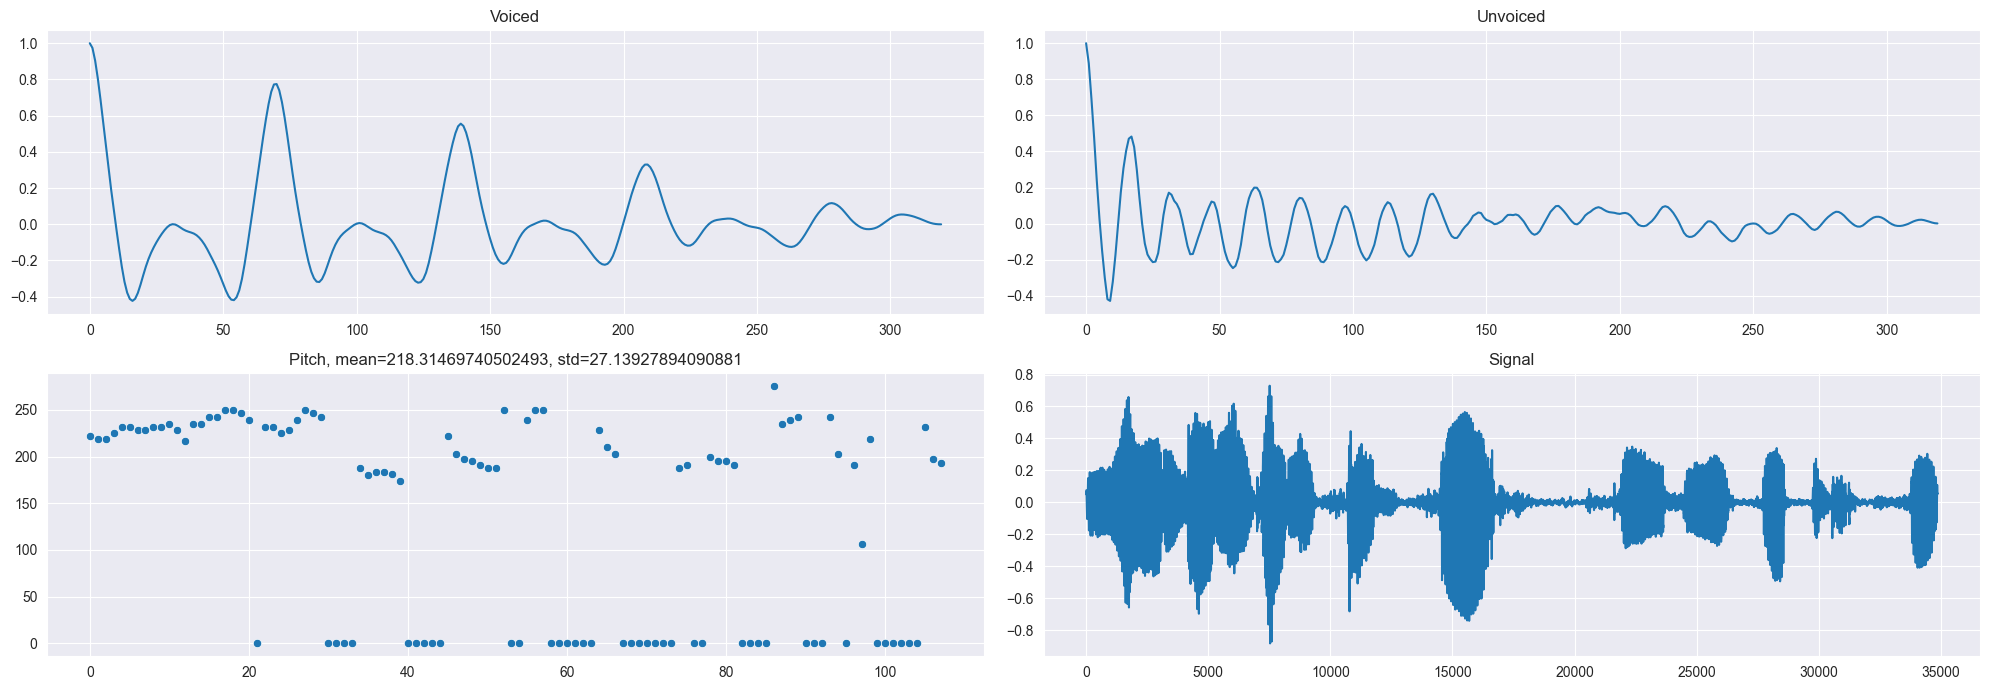

phone_M1


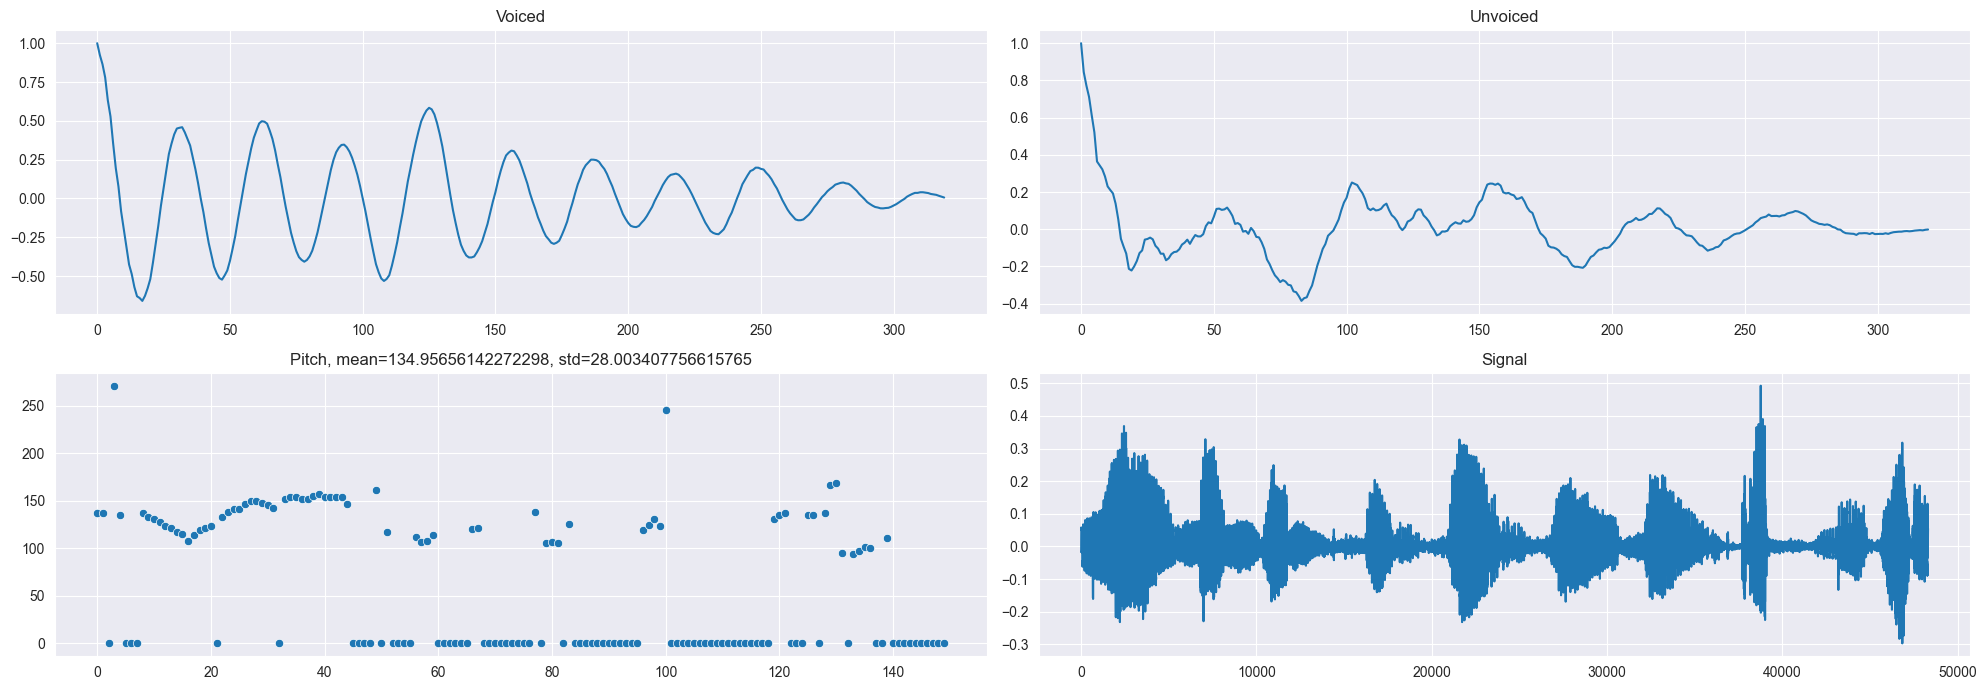

studio_F1


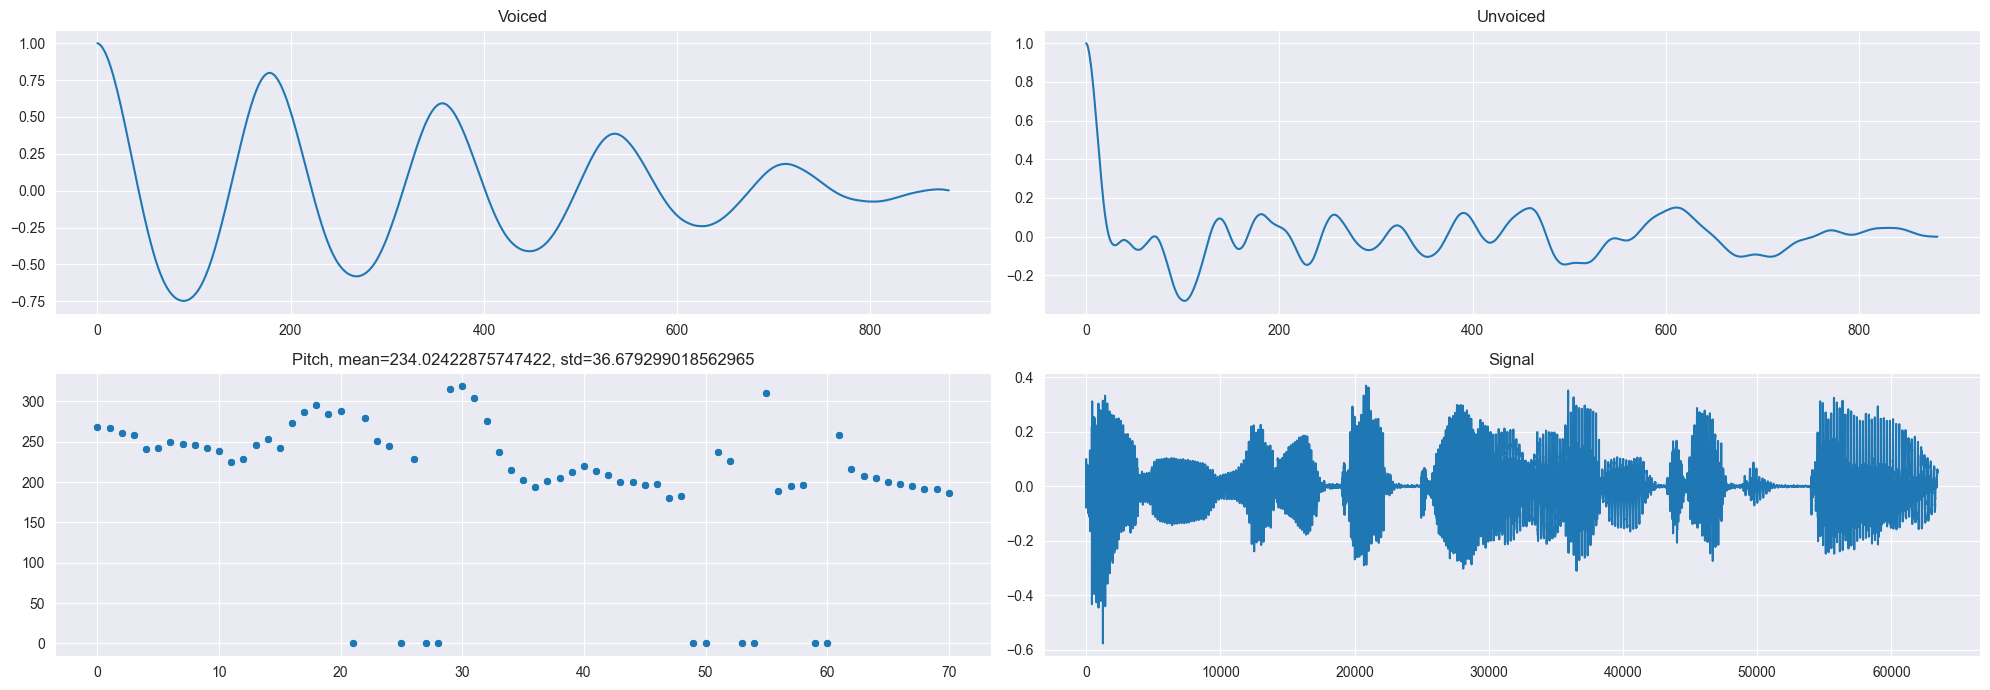

studio_M1


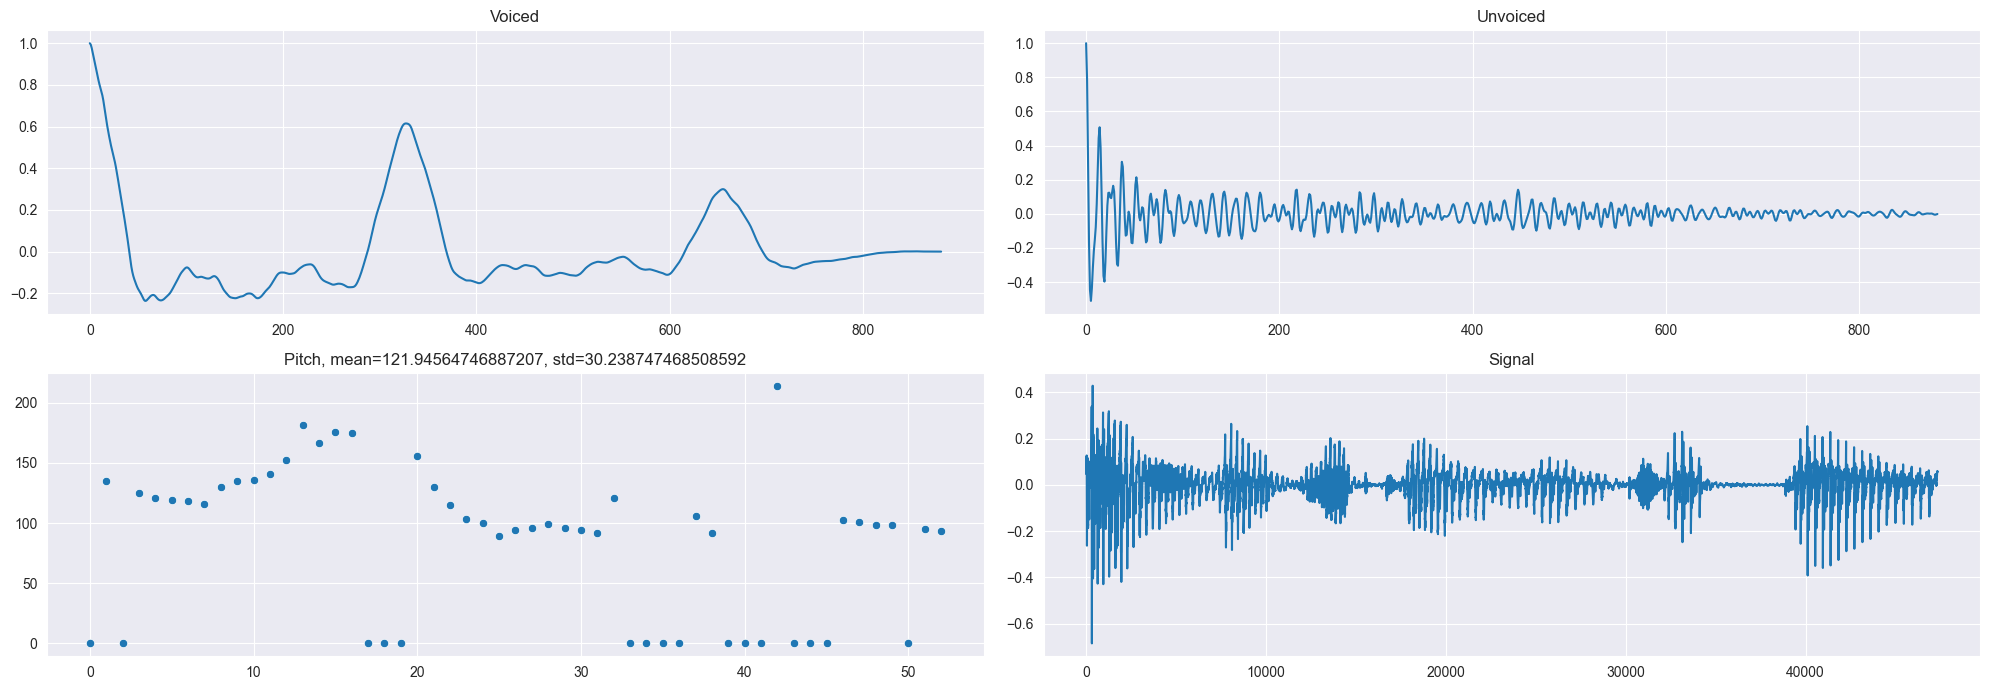

In [135]:
def main():
    voiced=[]
    unvoiced=[]
    filename=""
    for i in range(1,5):
        if i == 1:
            data, fs = sf.read('./TinHieuKiemThu/phone_F1.wav', dtype="float32")
            start, end = SilenceCrash(data, fs)
            if end != 0:
                data = data[round(start * fs): round(end * fs)]
            filename = "phone_F1"
        if i == 2:
            data, fs = sf.read('./TinHieuKiemThu/phone_M1.wav', dtype="float32")
            start, end = SilenceCrash(data, fs)
            if end != 0:
                data = data[round(start * fs): round(end * fs)]
            filename = "phone_M1"
        if i == 3:
            data, fs = sf.read('./TinHieuKiemThu/studio_F1.wav', dtype="float32")
            start, end = SilenceCrash(data, fs)
            if end != 0:
                data = data[round(start * fs): round(end * fs)]
            filename = "studio_F1"
        if i == 4:
            data, fs = sf.read('./TinHieuKiemThu/studio_M1.wav', dtype="float32")
            start, end = SilenceCrash(data, fs)
            if end != 0:
                data = data[round(start * fs): round(end * fs)]
            filename = "studio_M1"
        frames = SSD(data, fs, 0.02)
        F, voiced, unvoiced, meanF = findPitch(frames, fs)
        mean = np.mean(meanF)
        std = np.std(meanF)
        showPlot(F, data, mean, std, voiced[7], unvoiced[7], filename)

main()